MODELO DE INVERSIÓN. 

PARTE I: ESTRUCTURA INICIAL.

Librerías

In [2]:
#ASIGNACIÓN LIBRERÍAS. Pypsa para modelizar redes eléctricas/ Pandas para manipulación de datos tabulares (filas y columnas)/ Numpy para cálculos numéricos 
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Creación de Snapshot

In [3]:
#CREACIÓN DEL SNAPSHOT HORARIO. 
# Pasos: 
# 1. Definir el periodo. 
# 2. Crear la red vacía con esos snapshots
# 3. Calcular el peso de cada hora para extrapolar a un año completo.
# 4. Asignar el peso a cada snapshot
# 5. Verificar

# (1) Definir el periodo. 
hours=pd.date_range("2025-01-01", periods=24*7, freq="h") #El periodo de estudio representa 168h de 1 semana (24h*7días).
print (f"hours: {hours}")

# (2) Crear la red vacía con esos snapshots
network=pypsa.Network(snapshots=hours)

# (3) Calcular el peso de cada hora para extrapolar a un año completo
hours_per_year=365*24
snapshot_weight=len(hours)
single_weight=hours_per_year/snapshot_weight

# (4) Asignar el peso a cada snapshot
network.snapshot_weightings= pd.Series(single_weight,  index=network.snapshots)


# (5) Verificar
print("Snapshots creados", network.snapshots)
print ("Peso por snapshot", single_weight)

hours: DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-07 14:00:00', '2025-01-07 15:00:00',
               '2025-01-07 16:00:00', '2025-01-07 17:00:00',
               '2025-01-07 18:00:00', '2025-01-07 19:00:00',
               '2025-01-07 20:00:00', '2025-01-07 21:00:00',
               '2025-01-07 22:00:00', '2025-01-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='h')


INFO:pypsa.network.index:Applying weightings to all columns of `snapshot_weightings`


Snapshots creados DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-07 14:00:00', '2025-01-07 15:00:00',
               '2025-01-07 16:00:00', '2025-01-07 17:00:00',
               '2025-01-07 18:00:00', '2025-01-07 19:00:00',
               '2025-01-07 20:00:00', '2025-01-07 21:00:00',
               '2025-01-07 22:00:00', '2025-01-07 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=168, freq='h')
Peso por snapshot 52.142857142857146


Lectura de Datos (desde hojas Excel)

In [ ]:
# LECTURA DE LOS EXCELS.

#) Modelización de Inversión 
data = pd.read_excel('excels/Modelizacion_de_inversion_2040_1.xlsm', sheet_name=None, engine="openpyxl")

# Perfiles Solar y Eólico
df_profiles = pd.read_excel('excels/RES_Profiles.xlsm', sheet_name=None, engine='openpyxl', header=3)

# Hydro: Run of River
df_run_of_river = pd.read_excel('excels/run_of_rivers.xlsx', sheet_name=None, engine='openpyxl')

# Demanda eléctrica
df_demand2040 = pd.read_excel('excels/DemandaReal2040.xlsx', sheet_name=None, engine='openpyxl')



FileNotFoundError: [Errno 2] No such file or directory: 'Proyecto de Dispatching/excels/Modelizacion_de_inversion_2040_1.xlsm'

In [ ]:
# VERIFICACIÓN LECTURA DE DATOS CORRECTA

for sheet, df in data.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_profiles.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_run_of_river.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_demand2040.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())



Hoja 'Generators': 6 filas, 10 columnas


,Type,Name,Bus,p_nom,p_nom_extendable,p_nom_max,capital_cost,marginal_cost,carrier,overwrite
0,Generator,Solar,electricity_Market,0.000000,True,NaN,37903.47000,0.0,Solar,True
1,Generator,Wind,electricity_Market,0.000000,True,NaN,105391.33000,0.0,Wind,True
2,Generator,Biomass,electricity_Market,0.000000,True,3693.99,384049.00350,14.0,Biomass,True
3,Generator,Gas,gas_bus,0.000000,True,NaN,88195.00567,NaN,Gas,True
4,Generator,Water,electricity_Market,3424.665616,False,NaN,0.00000,4.0,Water,True


Hoja 'Carriers': 11 filas, 3 columnas


,Name,Commodity_Cost,Overwrite
0,AC,NaN,True
1,Water,NaN,True
2,Wind,NaN,True
3,Gas,NaN,True
4,Solar,NaN,True


Hoja 'Buses': 4 filas, 4 columnas


,Type,Name,carrier,overwrite
0,Bus,electricity_Market,Electricity,True
1,Bus,water_bus,Water,True
2,Bus,gas_bus,Gas,True
3,Bus,hydrogen_bus,Hydrogen,True


Hoja 'Links': 4 filas, 13 columnas


,Type,Name,Bus 1,Bus 2,p_nom,p_nom_extendable,capital_cost,efficiency,marginal_cost,Ramp limit up,Ramp limit down,carrier,overwrite
0,Link,CCGT,gas_bus,electricity_Market,0.00000,True,70877.9300,0.58,34.5,842.356028,1052.945035,Gas,True
1,Link,Turbina,water_bus,electricity_Market,11536.29614,False,0.0000,0.85,4.0,NaN,NaN,Water,True
2,Link,Pump,electricity_Market,water_bus,11536.29614,False,0.0000,0.75,40.0,NaN,NaN,AC,True
3,Link,Electrolyzer,electricity_Market,hydrogen_bus,0.00000,True,149714.5155,0.70,7.0,NaN,NaN,Hydrogen,True


Hoja 'Loads': 1 filas, 6 columnas


,Type,Name,Bus,p_set,carrier,overwrite
0,Load,Demand,hydrogen_bus,8652.968037,hydrogen,True


Hoja 'StorageUnit': 2 filas, 17 columnas


,Type,Name,Bus,p_nom,p_nom_extendable,max_hours,efficiency_store,efficiency_dispatch,e_min_pu,e_max_pu,Capital_cost,cyclic_state_of_charge,marginal_cost,carrier,overwrite,26698.52,2940000
0,StorageUnit,Battery,electricity_Market,0,True,4,0.896582,0.896582,NaN,NaN,103850.570,True,5,AC,True,NaN,NaN
1,StorageUnit,Hstorage,hydrogen_bus,0,True,1000,1.000000,1.000000,0.0,1.0,137330.728,True,0,Hydrogen,True,NaN,NaN


Hoja 'Store': 1 filas, 11 columnas


,Name,Bus,e_nom,e_initial,e_min_pu,e_max_pu,cyclic_state_of_charge,capital_cost,marginal_cost,carrier,overwrite
0,Embalse,water_bus,1387684000,1248915600,0.2,0.9,True,NaN,1,Water,True


Hoja 'Solar': 8760 filas, 16 columnas


,time,local_time,electricity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2019-01-01 00:00:00,2019-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,2019-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2019-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,2019-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 04:00:00,2019-01-01 05:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hoja 'Wind': 8760 filas, 14 columnas


,time,local_time,electricity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2019-01-01 00:00:00,2019-01-01 01:00:00,0.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,2019-01-01 02:00:00,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2019-01-01 03:00:00,0.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,2019-01-01 04:00:00,0.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 04:00:00,2019-01-01 05:00:00,0.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hoja 'River': 168 filas, 9 columnas


,Hora,Flow,%,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,541.541667,0.158114,NaN,NaN,NaN,NaN,1.0,12.997
1,2,541.541667,0.158114,NaN,NaN,NaN,NaN,2.0,13.295
2,3,541.541667,0.158114,NaN,1000.0,NaN,NaN,3.0,13.804
3,4,541.541667,0.158114,NaN,NaN,NaN,NaN,4.0,13.926
4,5,541.541667,0.158114,NaN,3425.0,NaN,NaN,5.0,14.089


Hoja 'Totales': 168 filas, 2 columnas


,Fecha,DEMANDA REAL 2040
0,2025-01-01 00:00:00.000,430151.456551
1,2025-01-01 01:00:00.000,415637.062747
2,2025-01-01 02:00:00.000,392824.336651
3,2025-01-01 02:59:59.985,370578.304502
4,2025-01-01 03:59:59.980,355352.248533


Hoja '2025-01-01': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (MWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (MWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-01 00:00:00,24620,25043,24805,36051.692437,430151.456551,NaN,2025-01-01 00:00:00,430151.456551
4,2025-01-01 00:05:00,24701,24941,24805,36170.302798,NaN,NaN,2025-01-01 01:00:00,415637.062747


Hoja '2025-01-02': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-02 00:00:00,24874,24993,24578,36423.6311,418205.489577,NaN,2025-01-01 00:00:00,418205.489577
4,2025-01-02 00:05:00,24690,24696,24578,36154.195219,NaN,NaN,2025-01-01 01:00:00,385466.101294


Hoja '2025-01-03': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-03 00:00:00,28116,28586,28132,41170.974191,477433.06082,NaN,2025-01-01 00:00:00,477433.06082
4,2025-01-03 00:05:00,28154,28368,28132,41226.618557,NaN,NaN,2025-01-01 01:00:00,436471.485168


Hoja '2025-01-04': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-04 00:00:00,28347,28201,27649,41509.233368,481590.280756,NaN,2025-01-01 00:00:00,481590.280756
4,2025-01-04 00:05:00,28438,28024,27649,41642.486984,NaN,NaN,2025-01-01 01:00:00,439439.672844


Hoja '2025-01-05': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-05 00:00:00,26852,26805,26331,39320.066829,453807.634103,NaN,2025-01-01 00:00:00,453807.634103
4,2025-01-05 00:05:00,26758,26572,26331,39182.420237,NaN,NaN,2025-01-01 01:00:00,416288.68757


Hoja '2025-01-06': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-06 00:00:00,25821,26165,25199,37810.347296,434635.221061,NaN,2025-01-01 00:00:00,434635.221061
4,2025-01-06 00:05:00,25554,25926,25199,37419.372402,NaN,NaN,2025-01-01 01:00:00,399217.581541


Hoja '2025-01-07': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-07 00:00:00,25503,25639,24947,37344.691805,433167.966966,NaN,2025-01-01 00:00:00,433167.966966
4,2025-01-07 00:05:00,25310,25118,24947,37062.076994,NaN,NaN,2025-01-01 01:00:00,400689.228612


In [ ]:
#PROCESAMIENTO 

# Run-of-River Inflow Semanal
df_hydro_inflows = df_run_of_river["River"]
hydro_inflows = df_hydro_inflows["%"].iloc[:len(hours)].reset_index(drop=True)

# Perfil Solar Semanal
df_Solar = df_profiles["Solar"]
solar_profile = df_Solar["electricity"].iloc[:len(hours)].reset_index(drop=True)

# Perfil Eólico Semanal
df_Wind = df_profiles["Wind"]
wind_profile = df_Wind["electricity"].iloc[:len(hours)].reset_index(drop=True)

# Demanda 2040
df_demand = df_demand2040["Totales"]
df_demand.index = pd.date_range(start='2025-01-01', periods=168, freq='h')
demand_profile = df_demand["DEMANDA REAL 2040"].iloc[:len(hours)].reset_index(drop=True)


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\1446496391.py:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



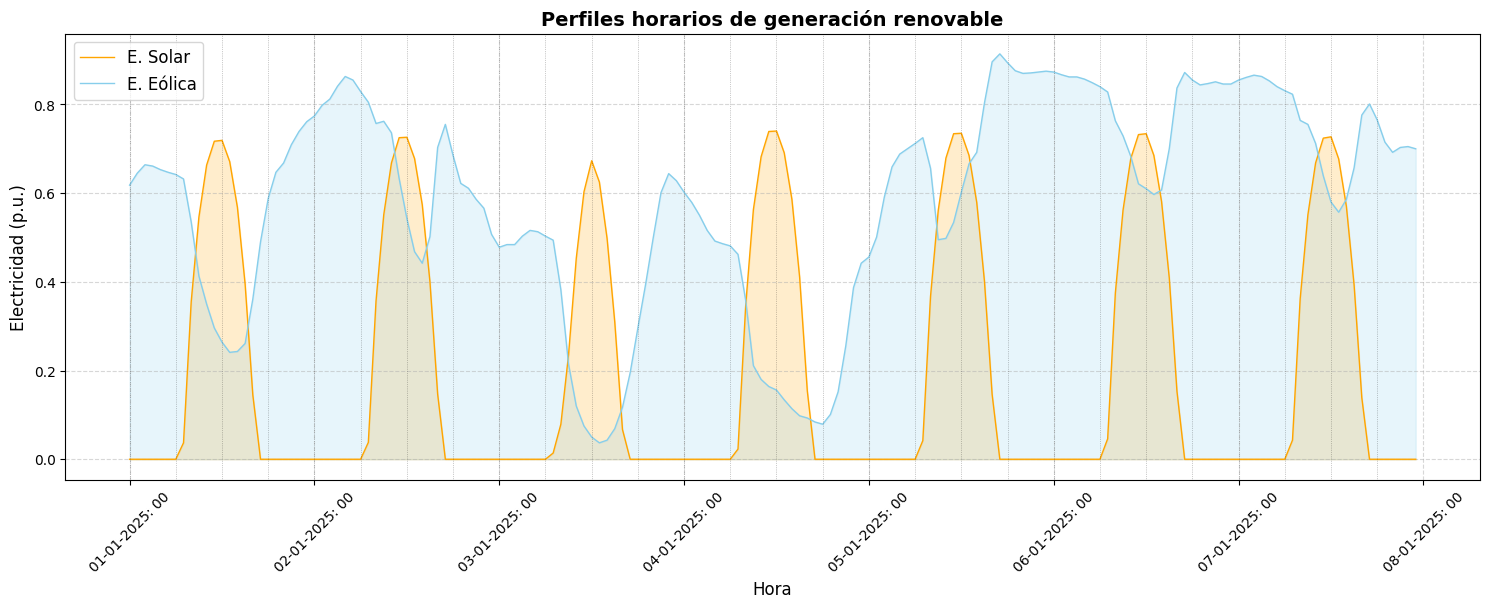

In [ ]:
# GRAFICAR

# Gráfica de Perfiles Horarios de Generación Renovable.
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora
plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, solar_profile, label="E. Solar", color="orange", linewidth=1, linestyle="-")
plt.plot(hours, wind_profile, label="E. Eólica", color="skyblue", linewidth=1, linestyle="-")
plt.title("Perfiles horarios de generación renovable", fontsize=14, fontweight="bold")
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Electricidad (p.u.)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.fill_between(hours, solar_profile, color="orange", alpha=0.2)
plt.fill_between(hours, wind_profile, color="skyblue", alpha=0.2)

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()



C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\639625715.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



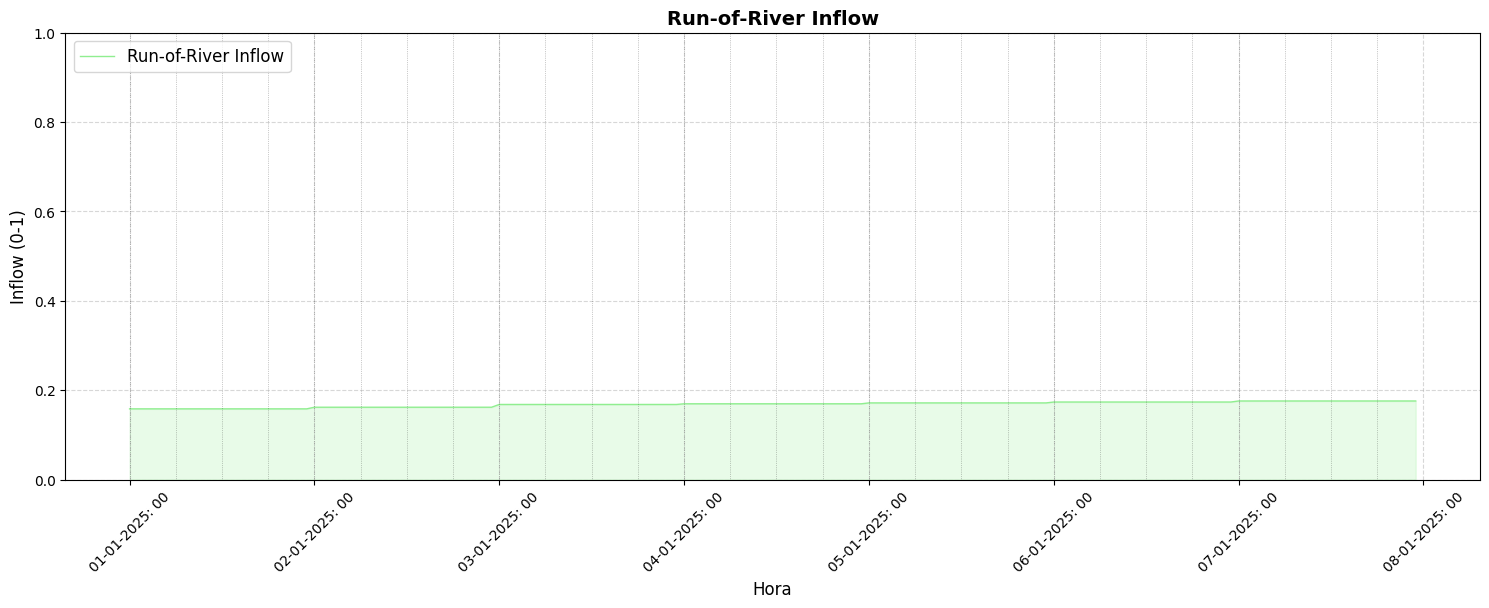

In [ ]:

#Gráfica Inflow Run-of-River
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora
hydro_normalized = hydro_inflows / hydro_inflows.max()

plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, hydro_inflows, label="Run-of-River Inflow", color="lightgreen", linewidth=1, linestyle="-")
plt.fill_between(hours, hydro_inflows, color="lightgreen", alpha=0.2)
plt.title("Run-of-River Inflow", fontsize=14, fontweight="bold")
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Inflow (0-1)", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()





C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\3255236423.py:3: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



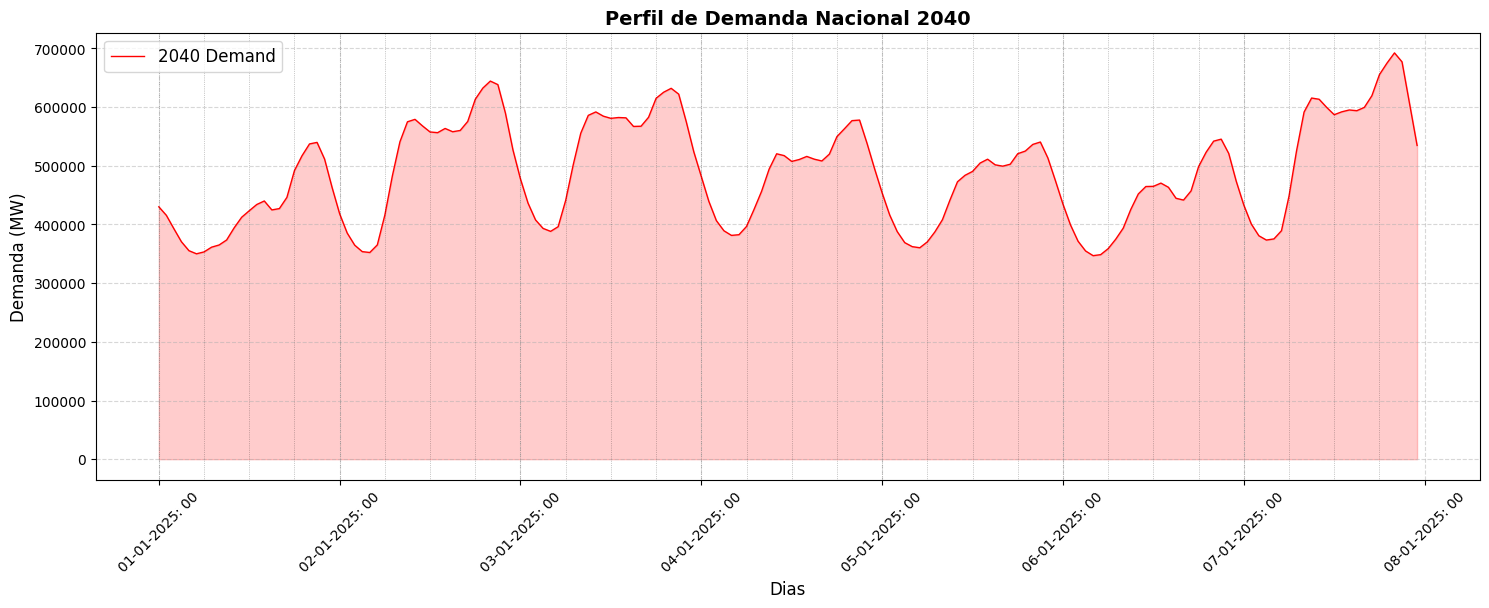

In [ ]:
 
# Dibuja la Demanda para la primera semana de 2040.

hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora
plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, demand_profile, label="2040 Demand", color="red", linewidth=1, linestyle="-")
plt.fill_between(hours, demand_profile, color="red", alpha=0.2)
plt.title("Perfil de Demanda Nacional 2040",  fontsize=14, fontweight="bold")
plt.xlabel("Dias", fontsize=12)
plt.ylabel("Demanda (MW)", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
#VERIFICACIÓN DEL PERFIL SOLAR

# Extrae las series de p_max_pu desde la red
#solar_pm = network.generators_t.p_max_pu["Solar"]
#wind_pm  = network.generators_t.p_max_pu["Wind"]

# Crea la figura con dos subplots
#fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Solar
#axes[0].plot(solar_profile.index, solar_profile, label="Perfil Solar Original")
#axes[0].plot(solar_pm.index,     solar_pm,     linestyle="--", label="p_max_pu Solar en la Red")
#axes[0].set_title("Verificación Perfil Solar")
#axes[0].set_ylabel("p_max_pu")
#axes[0].legend(loc="upper left", fontsize=9)

# Plot Wind
#axes[1].plot(wind_profile.index, wind_profile, label="Perfil Eólico Original")
#axes[1].plot(wind_pm.index,      wind_pm,      linestyle="--", label="p_max_pu Eólico en la Red")
#axes[1].set_title("Verificación Perfil Eólico")
#axes[1].set_xlabel("Hora")
#axes[1].set_ylabel("p_max_pu")
#axes[1].legend(loc="upper left", fontsize=9)

#plt.tight_layout()
#plt.show()

PARTE II: CREACIÓN DEL ENTORNO: Llamada a Componentes

In [ ]:
# Carriers
df_carriers = data["Carriers"]

for _, carrier in df_carriers.iterrows():
    network.add(
        "Carrier", 
        carrier["Name"],            # usa 'Name' si la columna está con mayúscula
        overwrite=carrier["Overwrite"]
    )

In [ ]:
# Buses
df_buses=data["Buses"]
for _, bus in df_buses.iterrows():
    network.add(
        "Bus", 
        bus["Name"], 
        carrier=bus["carrier"], 
        overwrite=bus["overwrite"]
    )

In [ ]:
# Loads

h2_profile = pd.Series(8652.968037, index=network.snapshots)

df_loads = data["Loads"]
for _, loads in df_loads.iterrows():
    network.add(
        "Load", 
        loads["Name"], 
        bus=loads["Bus"], 
        p_set=h2_profile, 
        carrier=bus["carrier"],
        overwrite=loads["overwrite"]
         )
    
network.add(
        "Load",
        name="Demanda_Nacional", #tiene un único nombre.
        bus="electricity_Market",
        p_set=df_demand['DEMANDA REAL 2040'], #Es una serie temporal (time series) con la potencia demandada (en MW ) para cada instante de tiempo (cada hora de la primera semana del año 2040).
        carrier="Electricity",
        overwrite=True
        )

demand = network.loads_t.p_set["Demanda_Nacional"]

In [ ]:
# Generador
df_generators=data["Generators"]

# Se asegura de que el índice de solar y wind coincidan.
solar_profile.index = hours
wind_profile.index  = hours

for _, gen in df_generators.iterrows():
    carrier_key = gen["carrier"].strip().lower()
    gen_kwargs = {      
        "bus":           gen["Bus"],
        "p_nom":         gen["p_nom"],
        "p_nom_extendable": gen["p_nom_extendable"],
       "p_nom_max":    gen["p_nom_max"],
        "capital_cost":  gen["capital_cost"],
        "marginal_cost": gen["marginal_cost"],
        "carrier":       gen["carrier"],
        "overwrite":     gen["overwrite"]
    }

# asignas el perfil horario segun el tipo de generador
    if carrier_key == "solar":
        gen_kwargs["p_max_pu"] = solar_profile
    elif carrier_key == "wind":
        gen_kwargs["p_max_pu"] = wind_profile
    elif carrier_key == "Water":
        gen_kwargs["p_max_pu"] = hydro_inflows

    network.add("Generator", gen["Name"], **gen_kwargs)

In [ ]:
# Links


df_links = data["Links"]

for _, lk in df_links.iterrows():
    name = lk["Name"].strip()
    bus0 = lk["Bus 1"].strip()
    bus1 = lk["Bus 2"].strip()

    # Check if buses exist
    if bus0 not in network.buses.index:
        raise ValueError(f"Bus '{bus0}' not found in network")
    if bus1 not in network.buses.index:
        raise ValueError(f"Bus '{bus1}' not found in network")


for _, lk in df_links.iterrows():
    name      = lk["Name"].strip()
    bus0      = lk["Bus 1"]
    bus1      = lk["Bus 2"]
    p_nom     = lk["p_nom"]
    p_nom_extendable = lk["p_nom_extendable"]
    capital_cost = lk["capital_cost"]
    eff       = lk["efficiency"]
    mcost     = lk["marginal_cost"]
    carrier   = lk["carrier"]
    overwrite = lk["overwrite"]

    if name.lower() == "ccgt":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            p_nom_extendable=p_nom_extendable, capital_cost=capital_cost,
            overwrite=overwrite,
            # ramp_limit_up=lk["Ramp limit up"],
            # ramp_limit_down=lk["Ramp limit down"]
        )
        # Turbina hidroeléctrica (descarga de agua → electricidad)
    elif name.lower() == "turbina":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,p_nom_extendable=p_nom_extendable, capital_cost=capital_cost,
            overwrite=overwrite
        )

    # Bomba (electricidad → bombeo de agua)
    elif name.lower() == "pump":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier, p_nom_extendable=p_nom_extendable, capital_cost=capital_cost,
            overwrite=overwrite
        )
    elif name.lower() == "electrolyzer":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff, p_nom_extendable=p_nom_extendable, capital_cost=capital_cost,
            marginal_cost=mcost, carrier=carrier,
            overwrite=overwrite)
    

In [ ]:
# Verificación
     
print("\n=== Resumen de todos los Links en la red ===")
print(network.links[[
        'bus0','bus1','p_nom','efficiency','marginal_cost','carrier',
        'ramp_limit_up','ramp_limit_down'
    ]])
for link_name in ["CCGT", "Turbina", "Pump", "Electrolyzer"]:
        if link_name in network.links.index:
            row = network.links.loc[link_name]
            print(f"\n--- Detalle de {link_name} ---")
            print(f"Origen (bus0):        {row['bus0']}")
            print(f"Destino (bus1):       {row['bus1']}")
            print(f"Capacidad (p_nom):    {row['p_nom']} MW")
            print(f"Eficiencia:           {row['efficiency']*100:.1f}%")
            print(f"Coste marginal:       {row['marginal_cost']} €/MWh")
            print(f"Carrier:              {row['carrier']}")
            # Ramp limits solo para CCGT
            if link_name == "CCGT":
                print(f"Ramp up limit:        {row['ramp_limit_up']} MW/h")
                print(f"Ramp down limit:      {row['ramp_limit_down']} MW/h")
        else:
            print(f"\n⚠️ El link '{link_name}' no se encontró en la red.")


=== Resumen de todos los Links en la red ===
                            bus0                bus1        p_nom  efficiency  \
name                                                                            
CCGT                     gas_bus  electricity_Market      0.00000        0.58   
Turbina                water_bus  electricity_Market  11536.29614        0.85   
Pump          electricity_Market           water_bus  11536.29614        0.75   
Electrolyzer  electricity_Market        hydrogen_bus      0.00000        0.70   

              marginal_cost   carrier  ramp_limit_up  ramp_limit_down  
name                                                                   
CCGT                   34.5       Gas            NaN              NaN  
Turbina                 4.0     Water            NaN              NaN  
Pump                   40.0        AC            NaN              NaN  
Electrolyzer            7.0  Hydrogen            NaN              NaN  

--- Detalle de CCGT ---
Origen (bu

In [ ]:
# Storage Units


df_storage = data["StorageUnit"]
for _, st in df_storage.iterrows():
    name      = st["Name"].strip()
    bus      = st["Bus"]         # origen de la energía
    p_nom     = st["p_nom"]         # capacidad nominal
    max_hours = st["max_hours"]         # horas máximas de almacenamiento
    efficiency_store = st["efficiency_store"]  # eficiencia de carga
    efficiency_dispatch = st["efficiency_dispatch"]  # eficiencia de descarga
    e_min_pu = st["e_min_pu"]  # estado de carga mínimo
    e_max_pu = st["e_max_pu"]  # estado de carga máximo
    marginal_cost = st["marginal_cost"]   # coste marginal
    p_nom_extendable = st["p_nom_extendable"]  # capacidad extendible
    capital_cost = st["Capital_cost"]     # coste de inversión
    cyclic_state_of_charge = st["cyclic_state_of_charge"]  # estado de carga cíclico
    state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"]
    carrier   = st["carrier"]         # etiqueta de carrier
    overwrite = st["overwrite"]       # si sobreescribe parámetros
    # Para CCGT incluimos además ramp limits
    if name.lower() == "hstorage":
        network.add("StorageUnit", 
            name= name, 
            bus=bus, 
            p_nom=p_nom*8760, 
            max_hours=max_hours, 
            efficiency_store=efficiency_store, 
            efficiency_dispatch=efficiency_dispatch,
            e_min_pu=e_min_pu, 
            e_max_pu=e_max_pu,
            marginal_cost=marginal_cost, 
            carrier=carrier, 
            overwrite=overwrite, 
            p_nom_extendable=p_nom_extendable, 
            capital_cost=capital_cost
        )

        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}, e_min_pu {e_min_pu} pu, e_max_pu {e_max_pu} pu")

    elif name.lower() == "battery":
        network.add("StorageUnit",
            name= name, 
            bus=bus, 
            p_nom=p_nom, 
            efficiency_store=efficiency_store, 
            efficiency_dispatch=efficiency_dispatch,
            marginal_cost=marginal_cost, 
            cyclic_state_of_charge=cyclic_state_of_charge, 
            carrier=carrier, 
            state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"], 
            overwrite=overwrite, 
            p_nom_extendable=p_nom_extendable, 
            capital_cost=capital_cost
        )
        
        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}")

StorageUnit Battery añadida en bus electricity_Market: 0 MW · 4 h y marginal cost 5
StorageUnit Hstorage añadida en bus hydrogen_bus: 0 MW · 1000 h y marginal cost 0, e_min_pu 0.0 pu, e_max_pu 1.0 pu


In [ ]:
# Store

df_store = data["Store"]
print("Type of df_store:", type(df_store))
for _, store in df_store.iterrows():
    network.add("Store", 
        store["Name"], 
        bus=store["Bus"], 
        e_nom=store["e_nom"],
        e_initial=store["e_initial"], 
        e_min_pu=store["e_min_pu"], 
        e_max_pu=store["e_max_pu"],  
        e_cyclic=store["cyclic_state_of_charge"], 
        capital_cost=store["capital_cost"], 
        marginal_cost=store["marginal_cost"], 
        carrier=store["carrier"],
        overwrite=store["overwrite"]
        )
    
    print(f"Store: {store['Name']} añadido en bus {store['Bus']}: {store['e_nom']} MWh · inicial {store['e_initial']} MWh · min {store['e_min_pu']} pu · max {store['e_max_pu']} pu · coste marginal {store['marginal_cost']}")

Type of df_store: <class 'pandas.core.frame.DataFrame'>
Store: Embalse añadido en bus water_bus: 1387684000 MWh · inicial 1248915600 MWh · min 0.2 pu · max 0.9 pu · coste marginal 1


In [ ]:
# RESTRICCIÓN POR EMISIONES DE CO2. Para que el gas no sobreproduzca cuando no toca.
# Precio CO2 y factor de emisión
co2_price = 100  # €/tCO2
emission_factor = 0.202  # tCO2/MWh para gas

# Coste adicional por CO2
co2_cost = co2_price * emission_factor  # 20.2 €/MWh

# Sumarlo al coste marginal del link CCGT
network.links.at["CCGT", "marginal_cost"] += co2_cost


In [ ]:
# Verificaciones

print("Solar p_max_pu:\n", network.generators_t.p_max_pu["Solar"].head())
print("Wind  p_max_pu:\n", network.generators_t.p_max_pu["Wind"].head())
print("Información de inversión de los generadores:")
print(network.generators)


Solar p_max_pu:
 snapshot
2025-01-01 00:00:00    0.0
2025-01-01 01:00:00    0.0
2025-01-01 02:00:00    0.0
2025-01-01 03:00:00    0.0
2025-01-01 04:00:00    0.0
Freq: h, Name: Solar, dtype: float64
Wind  p_max_pu:
 snapshot
2025-01-01 00:00:00    0.618
2025-01-01 01:00:00    0.645
2025-01-01 02:00:00    0.664
2025-01-01 03:00:00    0.661
2025-01-01 04:00:00    0.653
Freq: h, Name: Wind, dtype: float64
Información de inversión de los generadores:
                          bus control type        p_nom  p_nom_mod  \
name                                                                 
Solar      electricity_Market      PQ          0.000000        0.0   
Wind       electricity_Market      PQ          0.000000        0.0   
Biomass    electricity_Market      PQ          0.000000        0.0   
Gas                   gas_bus      PQ          0.000000        0.0   
Water      electricity_Market      PQ       3424.665616        0.0   
test_FLEX  electricity_Market      PQ          0.000000     

PARTE III: OPTIMIZACIÓN

In [ ]:
network.optimize(solver_name="highs")

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.68s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3033 primals, 6898 duals
Objective: 2.83e+11
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-fix-p-lower, Link-fix-p-upper, Link-ext-p-lower, Link-ext-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

PARTE IV: OBTENCIÓN DE RESULTADOS.

{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x15486219370>},
 'branches': {'Link': <matplotlib.collections.LineCollection at 0x15489ac5250>},
 'flows': {}}

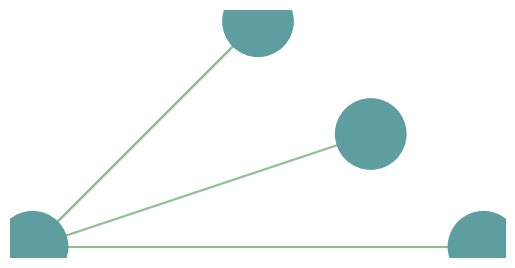

In [ ]:
network.plot()

In [ ]:
# RESULTADOS NUMÉRICOS QUE CUBREN LA DEMANDA

print(" Generator p:", network.generators_t.p.iloc[0])
print("Link p0:",     network.links_t.p0.iloc[0])
print("Link p1:",     network.links_t.p1.iloc[0])
print(" Load p:",      network.loads_t.p_set.iloc[0])

 Generator p: name
Solar            -0.000000
Wind         449303.054015
Biomass          -0.000000
Gas              -0.000000
Water            -0.000000
test_FLEX        -0.000000
Name: 2025-01-01 00:00:00, dtype: float64
Link p0: name
CCGT               -0.000000
Turbina            -0.000000
Pump               -0.000000
Electrolyzer    19151.597464
Name: 2025-01-01 00:00:00, dtype: float64
Link p1: name
CCGT                0.000000
Turbina             0.000000
Pump                0.000000
Electrolyzer   -13406.118225
Name: 2025-01-01 00:00:00, dtype: float64
 Load p: name
Demand                8652.968037
Demanda_Nacional    430151.456551
Name: 2025-01-01 00:00:00, dtype: float64


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\1917038006.py:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



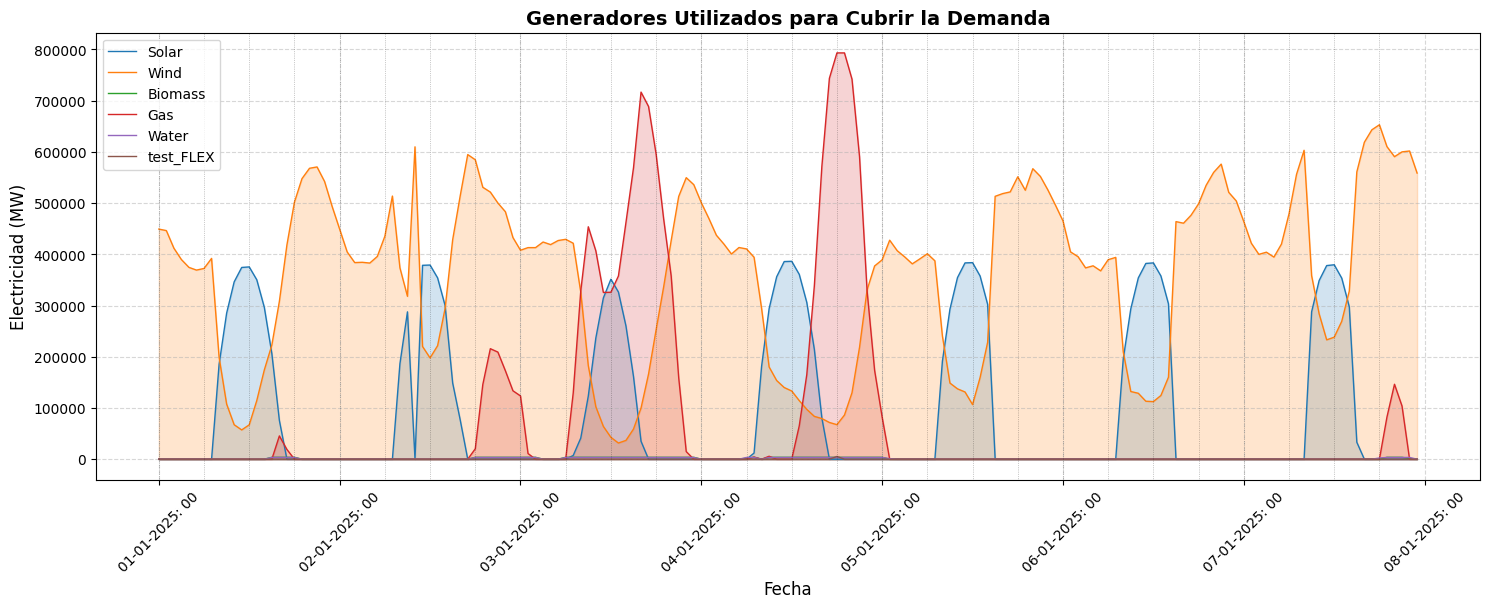

In [ ]:
# Gráfica de Generadores Utilizados para Cubrir la Demanda

# Asegurar las horas de estudio son correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para asegurarse que se grafica en el rango adecuado

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada generador manualmente
for gen in network.generators_t.p.columns:
    y= network.generators_t.p[gen]
    plt.plot(hours, network.generators_t.p[gen], label=gen, linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)
# Personalización
plt.title("Generadores Utilizados para Cubrir la Demanda", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Electricidad (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)

plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

# Mostrar
plt.show()


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\1438357164.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



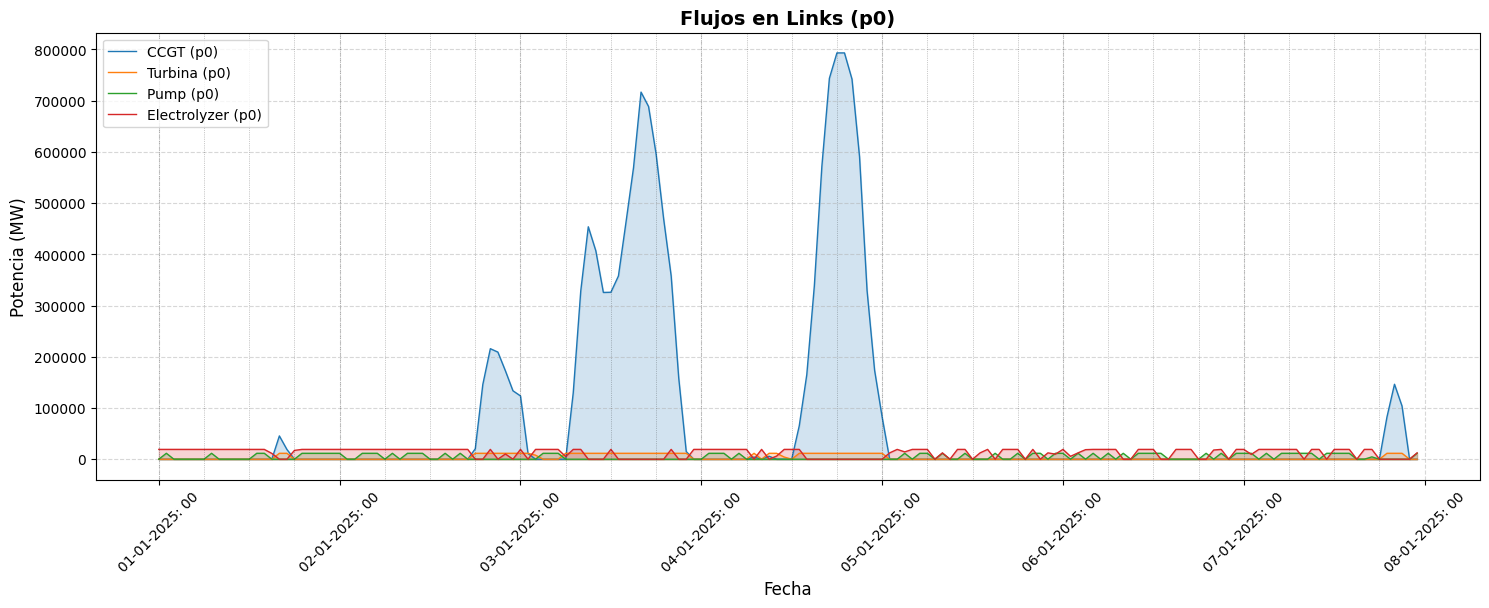

In [ ]:

# Asegurar las horas correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H")

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada link manualmente (p0)
for link in network.links_t.p0.columns:
    y = network.links_t.p0[link]
    plt.plot(hours, y, label=f"{link} (p0)", linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)

# Personalización
plt.title("Flujos en Links (p0)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Potencia (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

plt.show()


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_23104\2521935935.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



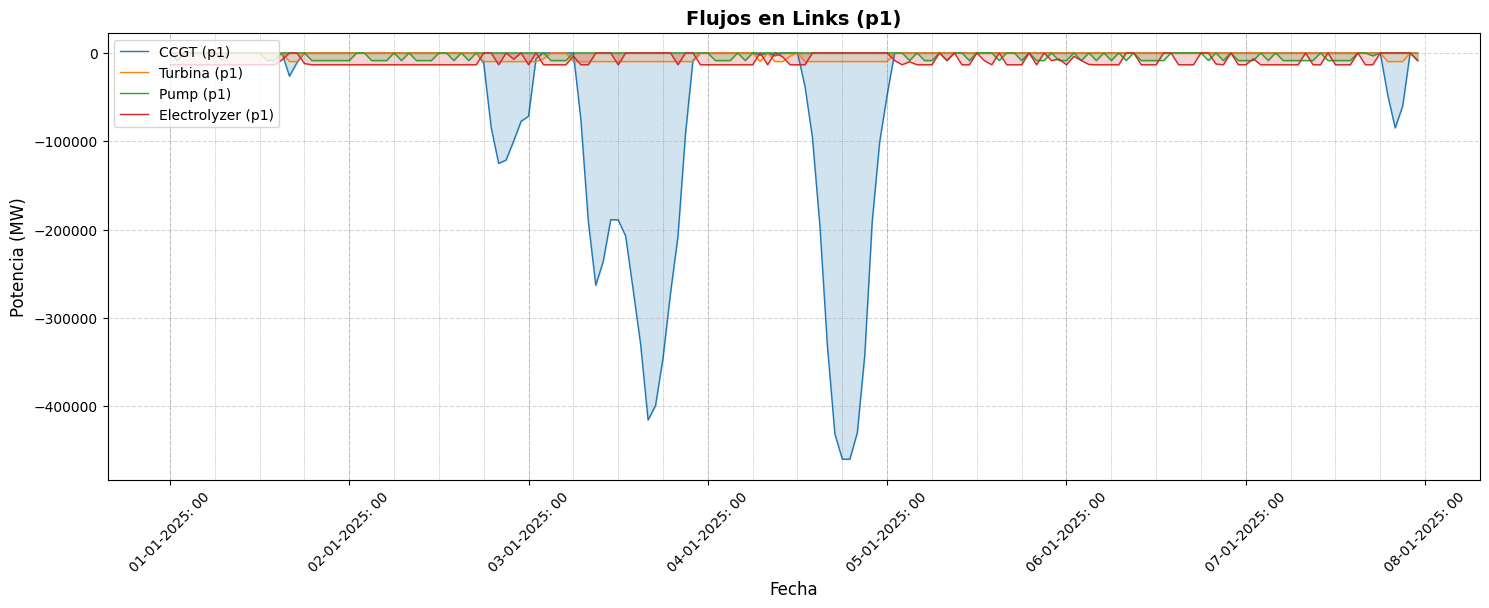

0.0
   Type  Name    Bus 1               Bus 2  p_nom  p_nom_extendable  \
0  Link  CCGT  gas_bus  electricity_Market    0.0              True   

   capital_cost  efficiency  marginal_cost  Ramp limit up  Ramp limit down  \
0      70877.93        0.58           34.5     842.356028      1052.945035   

  carrier  overwrite  
0     Gas       True  


In [ ]:

# Asegurar las horas correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H")

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada link manualmente (p1)
for link in network.links_t.p1.columns:
    y = network.links_t.p1[link]
    plt.plot(hours, y, label=f"{link} (p1)", linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)

# Personalización
plt.title("Flujos en Links (p1)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Potencia (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

plt.show()

print(network.links.loc["CCGT", "p_nom"])
print(df_links[df_links["Name"].str.lower() == "ccgt"])

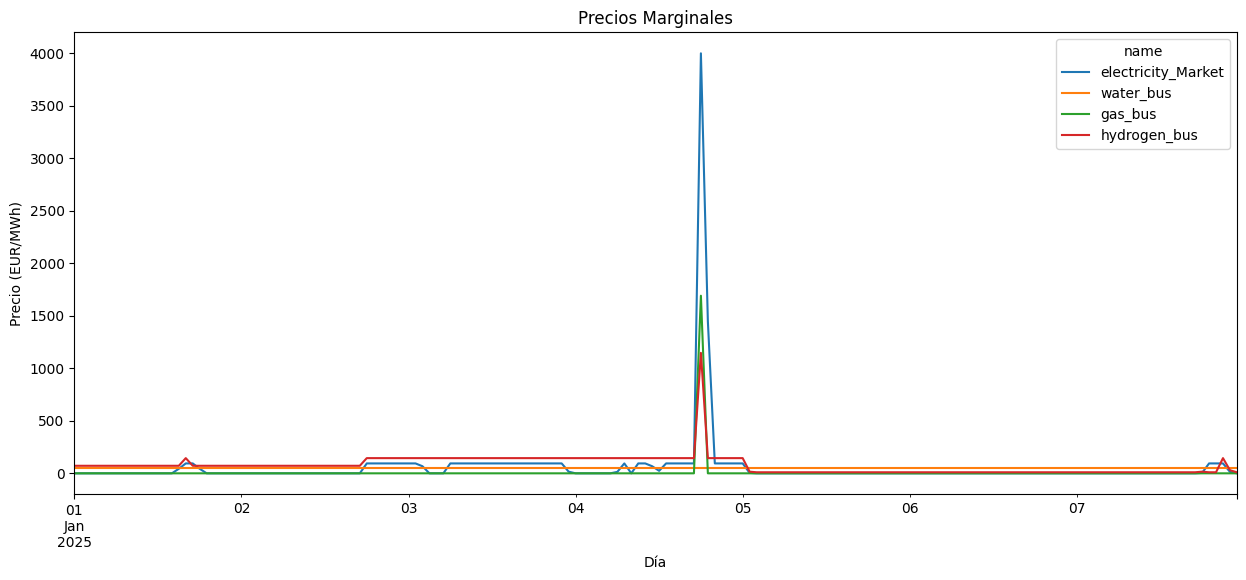

In [ ]:
# PRECIOS MARGINALES
network.buses_t.marginal_price.plot(figsize=(15, 6), title="Precios Marginales")
plt.xlabel("Día")
plt.ylabel("Precio (EUR/MWh)")
plt.show()

Text(0.5, 1.0, 'Generación por tecnología (MW)')

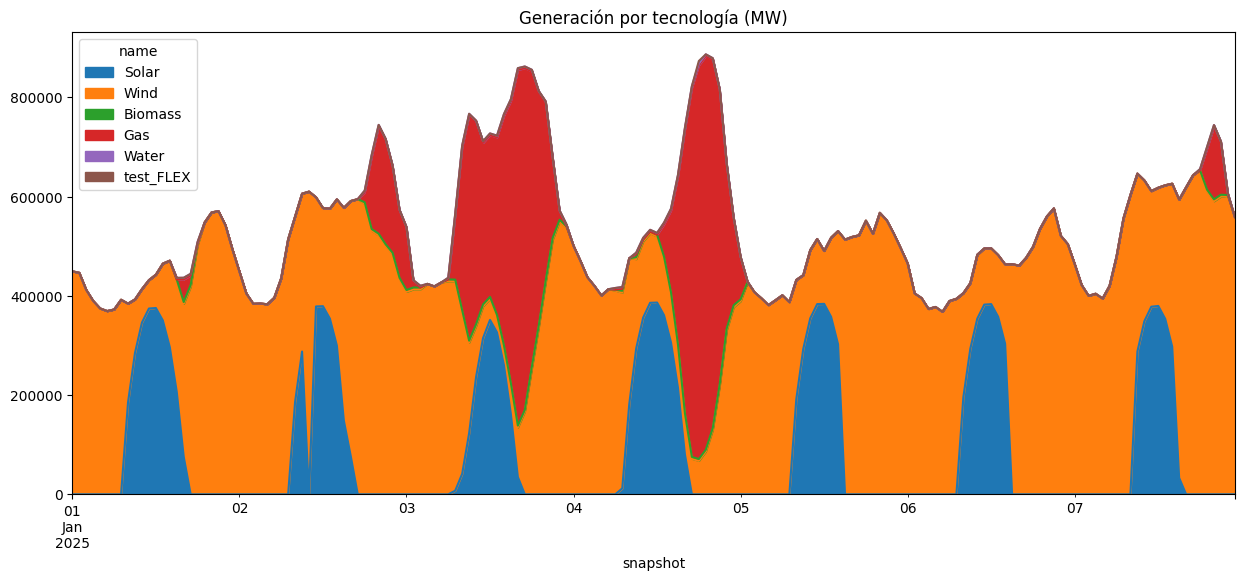

In [ ]:
# Generación horaria por tecnología. TENGO QUE AÑADIR GEN Y LINKS TB.

network.generators_t.p.plot.area(figsize=(15,6))
plt.title("Generación por tecnología (MW)")


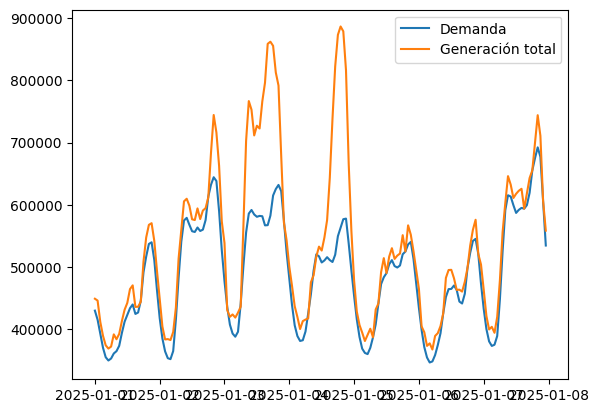

In [ ]:
#Demanda vs Generación. TENGO QUE AÑADIR TB NO SOLO LOS GENERADORES. 
demand = network.loads_t.p_set["Demanda_Nacional"]
total_gen = network.generators_t.p.sum(axis=1)
plt.plot(demand, label="Demanda")
plt.plot(total_gen, label="Generación total")
plt.legend()

In [ ]:
# COSAS A MEJORAR.

# Necesitamos poner algo de tope porque se genera mucho más de lo que se demanda en varios puntos. 
# Tira de gas en los días 3 y 4 cuando no se necesita por tanto el problema está en el gas.

# El precio marginal es demasiado alto

# Si en link CCGT, ponemos un valor de p_nom =10000 O 0 y False en p_nom_exten..., me da muchisisisisisisimo mejor
# la rampa de demanda y generación.